In [103]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [104]:
# 데이터 불러오기

path = os.getcwd() + '/data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names = ['Size', 'Bedrooms', 'Price'])

In [105]:
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Feature Scaling을 해 주기 위해
- 각 feature의 mean
- 각 feature의 standard deviation
을 구한 다음에 표준값 (z-score) 을 구해 준다. 

In [106]:
# 참고
mean_original_size = data2['Size'].mean()     # 1개 컬럼의 평균
std_original_size = data2['Size'].std()

In [107]:
mean_original_bedrooms = data2['Bedrooms'].mean()
std_original_bedrooms = data2['Bedrooms'].std()

In [138]:
mean_original_price = data2['Price'].mean()
std_original_price = data2['Price'].std()

In [139]:
data2.mean()     # 모든 컬럼의 평균 (컬럼 별))

Ones        1.000000e+00
Size        1.889741e-17
Bedrooms    2.279500e-16
Price      -8.031401e-17
dtype: float64

In [140]:
data2.std()     # 모든 컬럼의 표준편차 (컬럼 별))

Ones        0.0
Size        1.0
Bedrooms    1.0
Price       1.0
dtype: float64

In [141]:
data2 = (data2 - data2.mean()) / data2.std()

In [142]:
data2.head()

,Ones,Size,Bedrooms,Price
0,NaN,0.130010,-0.223675,0.475747
1,NaN,-0.504190,-0.223675,-0.084074
2,NaN,0.502476,-0.223675,0.228626
3,NaN,-0.735723,-1.537767,-0.867025
4,NaN,1.257476,1.090417,1.595389


In [143]:
# 그려 보자. 3D 니까 앞장과는 다르게 구현된다. 

def plotData(df):
    price_3d = plt.figure().gca(projection='3d')
    price_3d.scatter(df['Size'], df['Bedrooms'], df['Price'])
    price_3d.set_xlabel('Size')
    price_3d.set_ylabel('Bedrooms')
    price_3d.set_zlabel('Price')
    plt.show()

In [144]:
plotData(data2)

ValueError: Unknown projection '3d'

In [ ]:
# x0 의 값 (1) 을 추가해 주자

data2.insert(0, 'Ones', 1)

In [ ]:
data2.head()

In [145]:
# Training set 인 data2를 X2 와 y2 로 분리해 준다. 

X2 = data2.iloc[:,0:3]
y2 = data2.iloc[:,3:4]

In [146]:
X2.head()

,Ones,Size,Bedrooms
0,NaN,0.130010,-0.223675
1,NaN,-0.504190,-0.223675
2,NaN,0.502476,-0.223675
3,NaN,-0.735723,-1.537767
4,NaN,1.257476,1.090417


In [147]:
y2.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [148]:
# pandas 의 dataframe 을 numpy 의 matrix 로 변환

X2 = np.matrix(X2)
y2 = np.matrix(y2)

In [149]:
# theta 벡터를 초기화

theta2 = np.matrix(np.array([0,0,0]))
# theta2 = np.matrix(np.zeros(3))     # 동일 결과

In [150]:
X2.shape, y2.shape, theta2.shape

((47, 3), (47, 1), (1, 3))

## Normal Equation 으로 theta 구하기
계속 진행하기에 앞서, GD 대신에 Normal Equation 이용해서 간단하게 theta를 구해보자.
NE 에는 feature scaling도 필요 없다. 
뒤에서 GD로 구한 값과 거의 차이 없는 것을 확인할 수 있다. 

In [151]:
# 방법 1 : matrix 형에서 구하기
theta_optimized_normal_equation = np.linalg.inv(X2.T*X2)*X2.T*y2
theta_optimized_normal_equation

matrix([[ nan],
        [ nan],
        [ nan]])

In [152]:
# 방법 2: array 형에서 구하기
X = np.array(X2)
y = np.array(y2)
theta_optimized_NE = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), y)
theta_optimized_NE

array([[ nan],
       [ nan],
       [ nan]])

## Cost function & Gradient Descent 로 theta 구하기

In [153]:
# Cost function 만들어 준다.
# ex1에서의 cost function과 완전히 동일!

def computeCost(X, y, theta):
    return np.sum(np.power((X*theta.T - y), 2))/(2*X.shape[0])

In [154]:
# theta 는 (0,0,0) 인 상태에서 cost 를 구해 보자.

cost_initial = computeCost(X2, y2, theta2)
cost_initial

nan

In [155]:
# Cost function을 최소화하기 위해 업데이트하는 함수를 만들어 주자
# ex1에서의 cost function과 완전히 동일!

def gradientDescent(X, y, theta, alpha, iters):
    theta_temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)
    for i in range(iters):
        error = X*theta.T - y
        for j in range(X.shape[1]):
            theta_temp[0:,j] = theta[0:,j] - alpha*(1.0/X.shape[0])*sum(np.multiply(error, X[:,j]))
        theta = theta_temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [156]:
alpha2 = 0.01
iters2 = 1000
theta_optimized, cost = gradientDescent(X2, y2, theta2, alpha2, iters2)

In [157]:
theta_optimized

matrix([[ nan,  nan,  nan]])

In [158]:
cost

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

In [159]:
computeCost(X2, y2, theta_optimized)

nan

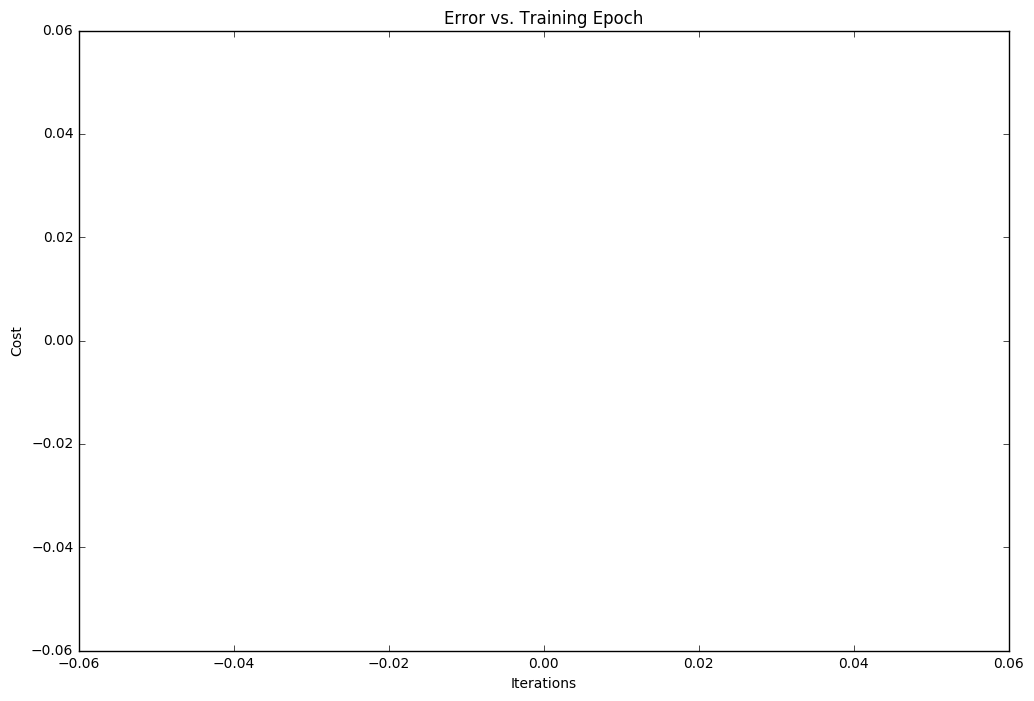

In [160]:
# cost 감소 추이를 그려보자 (역시 ex1과 동일)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters2), cost, 'r')  

ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 
plt.show()

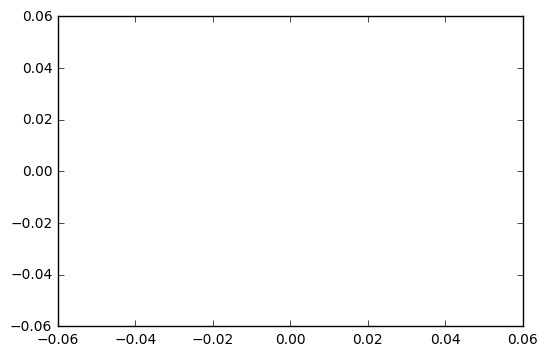

In [161]:
# 더 간단히 그리기
plt.plot(np.arange(iters2), cost)

In [169]:
# Size가 5,000이고 방이 6개인 집의 가격을 예측해 보면?

def predictPrice(size, bedrooms):
    size = (size - mean_original_size) / std_original_size
    bedrooms = (bedrooms - mean_original_bedrooms) / std_original_bedrooms
    priceEstimated = np.dot(np.array([[1, size, bedrooms]]), theta_optimized.T)
    priceEstimated2 = priceEstimated * std_original_price + mean_original_price
    return priceEstimated2

In [170]:
predictPrice(3000,3)

matrix([[ nan]])